In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('../code_snippets_settings/matplotlibrc') # this file sets our global settings for plotting(makes less bloated in the notebook)


path = 'https://www.openintro.org/data/csv/' # url path to openintro.org data # access remote source

# path = %pwd # local path if you had downloaded the data
# path += '/csv/' 

# Chapter 1

---

## 1.1 1.2 `stent30`, `stent365`
page 8

In [2]:
p_30 = pd.read_csv(path+"stent30.csv", header=0, names=['group', '0-30'])
p_365 = pd.read_csv(path+"stent365.csv", header=0, names=['group', '0-365'])

one_one = p_30.merge(
    p_365, 
    on='group', 
    left_index=True,
    right_index=True
    ).set_index(np.arange(1, 452))

one_one.index.name = 'patient'
one_one.head()

,group,0-30,0-365
patient,,,
1,treatment,stroke,stroke
2,treatment,stroke,stroke
3,treatment,stroke,stroke
4,treatment,stroke,stroke
5,treatment,stroke,stroke


In [3]:
one_two = (one_one.groupby('group')
           .agg([('value_counts')])
           .unstack(1)
           .droplevel(1, axis=1))

one_two.columns.names = ['days', 'outcome']
one_two

days          0-30           0-365       
outcome   no event stroke no event stroke
group                                    
control        214     13      199     28
treatment      191     33      179     45

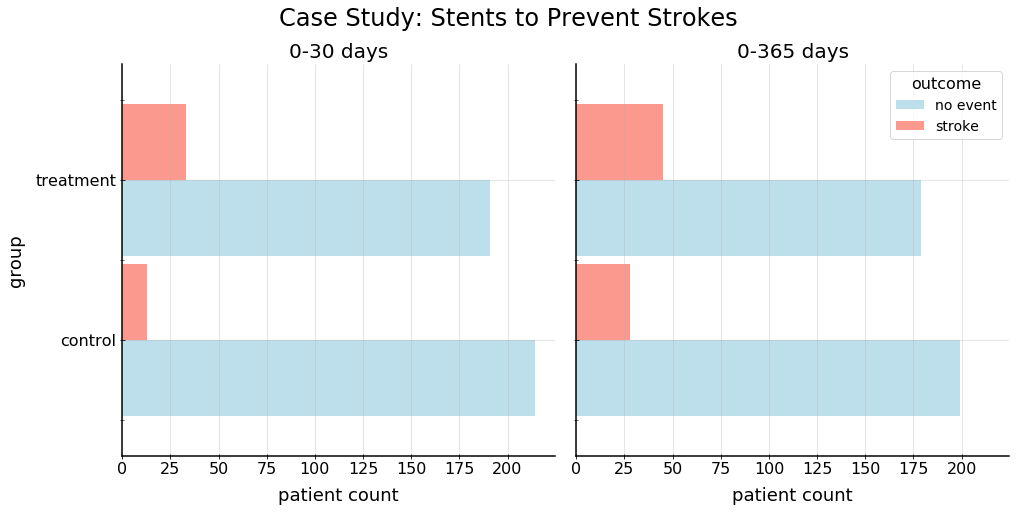

In [4]:
fig, axes1=(_, _) = plt.subplots(1,2,sharey=True, sharex=True, constrained_layout=True);
fig.suptitle('Case Study: Stents to Prevent Strokes');

zip_package = list(zip(                     
    axes1,                                  # sublot axes
    [one_two['0-30'], one_two['0-365']],    # Series from  
    ['0-30 days', '0-365 days'],            # subplot titles
    ['patient count'] * 2,                  # xlabels
    ['group', None],                        # ylabels
    [False, True],                          # subplot legends
))

for (ax, df, title, xlabel, ylabel, legend) in zip_package: 
    df.plot.barh(ax=ax, alpha=0.8,legend=legend,label=title, width=0.95,color=['lightblue', 'salmon']); 
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel); 

---

## 1.3 `email50`

page 10

In [5]:
one_three = pd.read_csv(
    path+"email50.csv", 
    header=0)
one_three.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none


---
## 1.5 `county`
page 14

*Does not contain `fed_spend` column as is assumed in the book so I chart other variables*  


In [6]:
one_five = pd.read_csv(
    path+"county.csv", 
    header=0)
one_five.head(3)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial


## 1.9 Percent of Units in Mulit-Unit Structures

In [29]:
fig, axes=(_, _) = plt.subplots(1,2,sharey=True, sharex=True,constrained_layout=True)
fig.suptitle('U.S. Counties');



zip_package = list(zip(
    (axes),                                 # subplot axes
    [one_five[(one_five.metro == 'yes')],     # dataframes
        one_five[(one_five.metro == 'no')]],  
    ['Metropolitan','Non-metropolitan'],     # subplot titles
    ['% multi unit buildings']*2,           # xlabels
    ['% home ownership', None]            # ylabels
))

# Plotting general
for ax, df, title, x,y in zip_package: 
    ax.scatter(data=df, y='homeownership', x='multi_unit', s=df['per_capita_income']/500, alpha=0.7, label='per capita income'); 
    ax.set(title=title, xlabel=x, ylabel=y);

# Outliers annotation
outliers = one_five[(one_five.multi_unit > one_five.multi_unit.quantile(0.995) ) &
                    (one_five.homeownership < one_five.homeownership.quantile(0.05))].nlargest(7, 'multi_unit')


offset = [ 5,  10,  9, 11, 13, 15, 17]
for i in range(outliers.shape[0]):
    county = outliers.name.tolist()[i]
    x, y = outliers.multi_unit.tolist()[i], outliers.homeownership.tolist()[i]
    axes[0].annotate(county,(x,y),xytext=(x, y+offset[i]),
                     arrowprops = dict(arrowstyle = "simple",
                                       connectionstyle = "angle,angleA=0,angleB=90,rad=10"))
        
axes[1].legend();

ValueError: 'path' is not a valid quadratic Bezier curve

<Figure size 1008x504 with 2 Axes>